In [1]:
"""MP4.1"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
print(pd.__version__)
labels = ['patient ID', 'Malignant/Benign', 'radius (mean)', 'radius (stderr)', 'radius (worst)', 'texture (mean)',
          'texture (stderr)', 'texture (worst)', 'perimeter (mean)', 'perimeter (stderr)', 'perimeter (worst)',
          'area (mean)', 'area (stderr)', 'area (worst)', 'smoothness (mean)', 'smoothness (stderr)',
          'smoothness (worst)', 'compactness (mean)', 'compactness (stderr)', 'compactness (worst)', 'concavity (mean)',
          'concavity (stderr)', 'concavity (worst)', 'concave points (mean)', 'concave points (stderr)',
          'concave points (worst)', 'symmetry (mean)', 'symmetry (stderr)', 'symmetry (worst)',
          'fractal dimension (mean)', 'fractal dimension (stderr)', 'fractal dimension (worst)']
subset_labels = ['smoothness (worst)', 'concave points (stderr)', 'area (mean)', 'fractal dimension (mean)']
tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat", header=None, names=labels)

1.0.1


FileNotFoundError: [Errno 2] File breast-cancer-train.dat does not exist: 'breast-cancer-train.dat'

fractal dimension (stderr)


Text(0, 0.5, 'y')

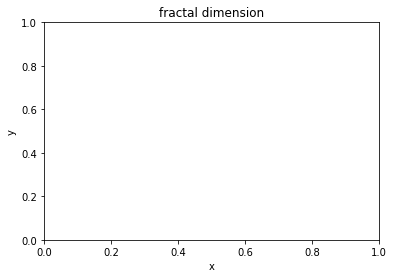

In [2]:
user_column = labels[30]
print(user_column)
plt.figure()
plt.title('fractal dimension')
plt.xlabel('x')
plt.ylabel('y')

In [7]:
"""MP4.2"""
A = np.array([[2,200],[5,600],[5,300]])
b = np.array([500,500,200])
w = la.lstsq(A,b)[0]
print(w)
print(2*w[0]+200*w[1])

[-20.           1.13877551]
187.75510204081624


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [34]:
"""MP4.3"""
tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat", header=None, names=labels)
tumor = tumor_data[labels[1]]
def diagnosis(values):
    res = []
    for value in values:
        if value == 'M':
            res.append(1.0)
        else:
            res.append(-1.0)
    res = np.array(res)
    return res

b = diagnosis(tumor)

In [35]:
"""MP4.4"""

A_linear = []
for sub in subset_labels:
    A_linear.append(tumor_data[sub].values.tolist())
A_linear = np.array(A_lnear).T

In [36]:
"""MP4.5"""

A_quad = []
for i in subset_labels:
    A_quad.append(tumor_data[i])
for i in subset_labels:
    A_quad.append(tumor_data[i] ** 2)
for i in range(len(subset_labels) - 1):
    for j in range(i+1, len(subset_labels)):
        A_quad.append(tumor_data[subset_labels[i]] * tumor_data[subset_labels[j]])
A_quad = np.array(A_quad).T

In [37]:
"""MP4.6"""
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
validate_data = pd.io.parsers.read_csv("breast-cancer-validate.dat", header=None, names=labels)

"""MP4.6"""

# 1: Obtain the linear least squares solution 2 for the linear A_linear and quadratic A_quad representation
U1, E1, V1 = np.linalg.svd(A_linear, full_matrices=False)
U2, E2, V2 = np.linalg.svd(A_quad, full_matrices=False)
temp1 = np.divide(np.dot(U1.T, b), E1)
weights_linear = np.dot(V1.T, temp1)
temp2 = np.divide(np.dot(U2.T, b), E2)
weights_quad = np.dot(V2.T, temp2)

# 2: Store the linear representation in the variable A_val_linear and the quadratic representation in the variable A_val_quad.

A_val_linear = []
for sub in labels[2:32]:
    A_val_linear.append(validate_data[sub].values.tolist())
A_val_linear= np.array(A_val_linear).T

A_val_quad = []
for i in subset_labels:
    A_val_quad.append(validate_data[i])
for i in subset_labels:
    A_val_quad.append(validate_data[i] ** 2)
for i in range(len(subset_labels) - 1):
    for j in range(i+1, len(subset_labels)):
        A_val_quad.append(validate_data[subset_labels[i]] * validate_data[subset_labels[j]])
A_val_quad = np.array(A_val_quad).T

# 3: Use your calculated weights weights_linear and weights_quad, and the linear and quadratic representations A_val_linear and A_val_quad to predict the status of the tumors of patients in the validation dataset. For each representation, the result is a prediction array P
# 4: see how well your weights predict whether a tumor is malignant or benign. This means comparing your predictions for both models to the actual outcomes recorded in breast-cancer-validate.dat. To do so, we will count the number of false-positives (fp) and false-negatives (fn) that occur for both the linear and quadratic representation.

def my_func(value):
        if value == 'M':
            return 1.0
        else:
            return -1.0

new_b = validate_data[labels[1]].apply(my_func)
new_b = np.array(new_b, dtype = 'float64')
fp_linear = ((new_b<0) & (A_val_linear @ weights_linear>0)).sum()
fn_linear = ((new_b>0) & (A_val_linear @ weights_linear<0)).sum()
fp_quad = ((new_b<0) & (A_val_quad @ weights_quad>0)).sum()
fn_quad = ((new_b>0) & (A_val_quad @ weights_quad<0)).sum()

# 5: Visualize your results by calling bar_graph(fp_linear, fn_linear, fp_quad, fn_quad) function.
bar_graph(fp_linear, fn_linear, fp_quad, fn_quad)

FileNotFoundError: [Errno 2] File breast-cancer-validate.dat does not exist: 'breast-cancer-validate.dat'